In [1]:
!wget https://raw.githubusercontent.com/AlexeyAB/darknet/master/cfg/yolov4.cfg -O yolov4.cfg
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4.weights -O yolov4.weights

--2024-04-21 22:05:29--  https://raw.githubusercontent.com/AlexeyAB/darknet/master/cfg/yolov4.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12231 (12K) [text/plain]
Saving to: ‘yolov4.cfg’

yolov4.cfg          100%[===================>]  11.94K  --.-KB/s    in 0.001s  

2024-04-21 22:05:29 (19.2 MB/s) - ‘yolov4.cfg’ saved [12231/12231]

--2024-04-21 22:05:29--  https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4.weights
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://objects.githubusercontent.com/github-production-release-asset-2e65be/75388965/4b8a4e00-b2d7-11eb-900f-678196af5945?X-Amz-

Saving catdog.jpg to catdog.jpg


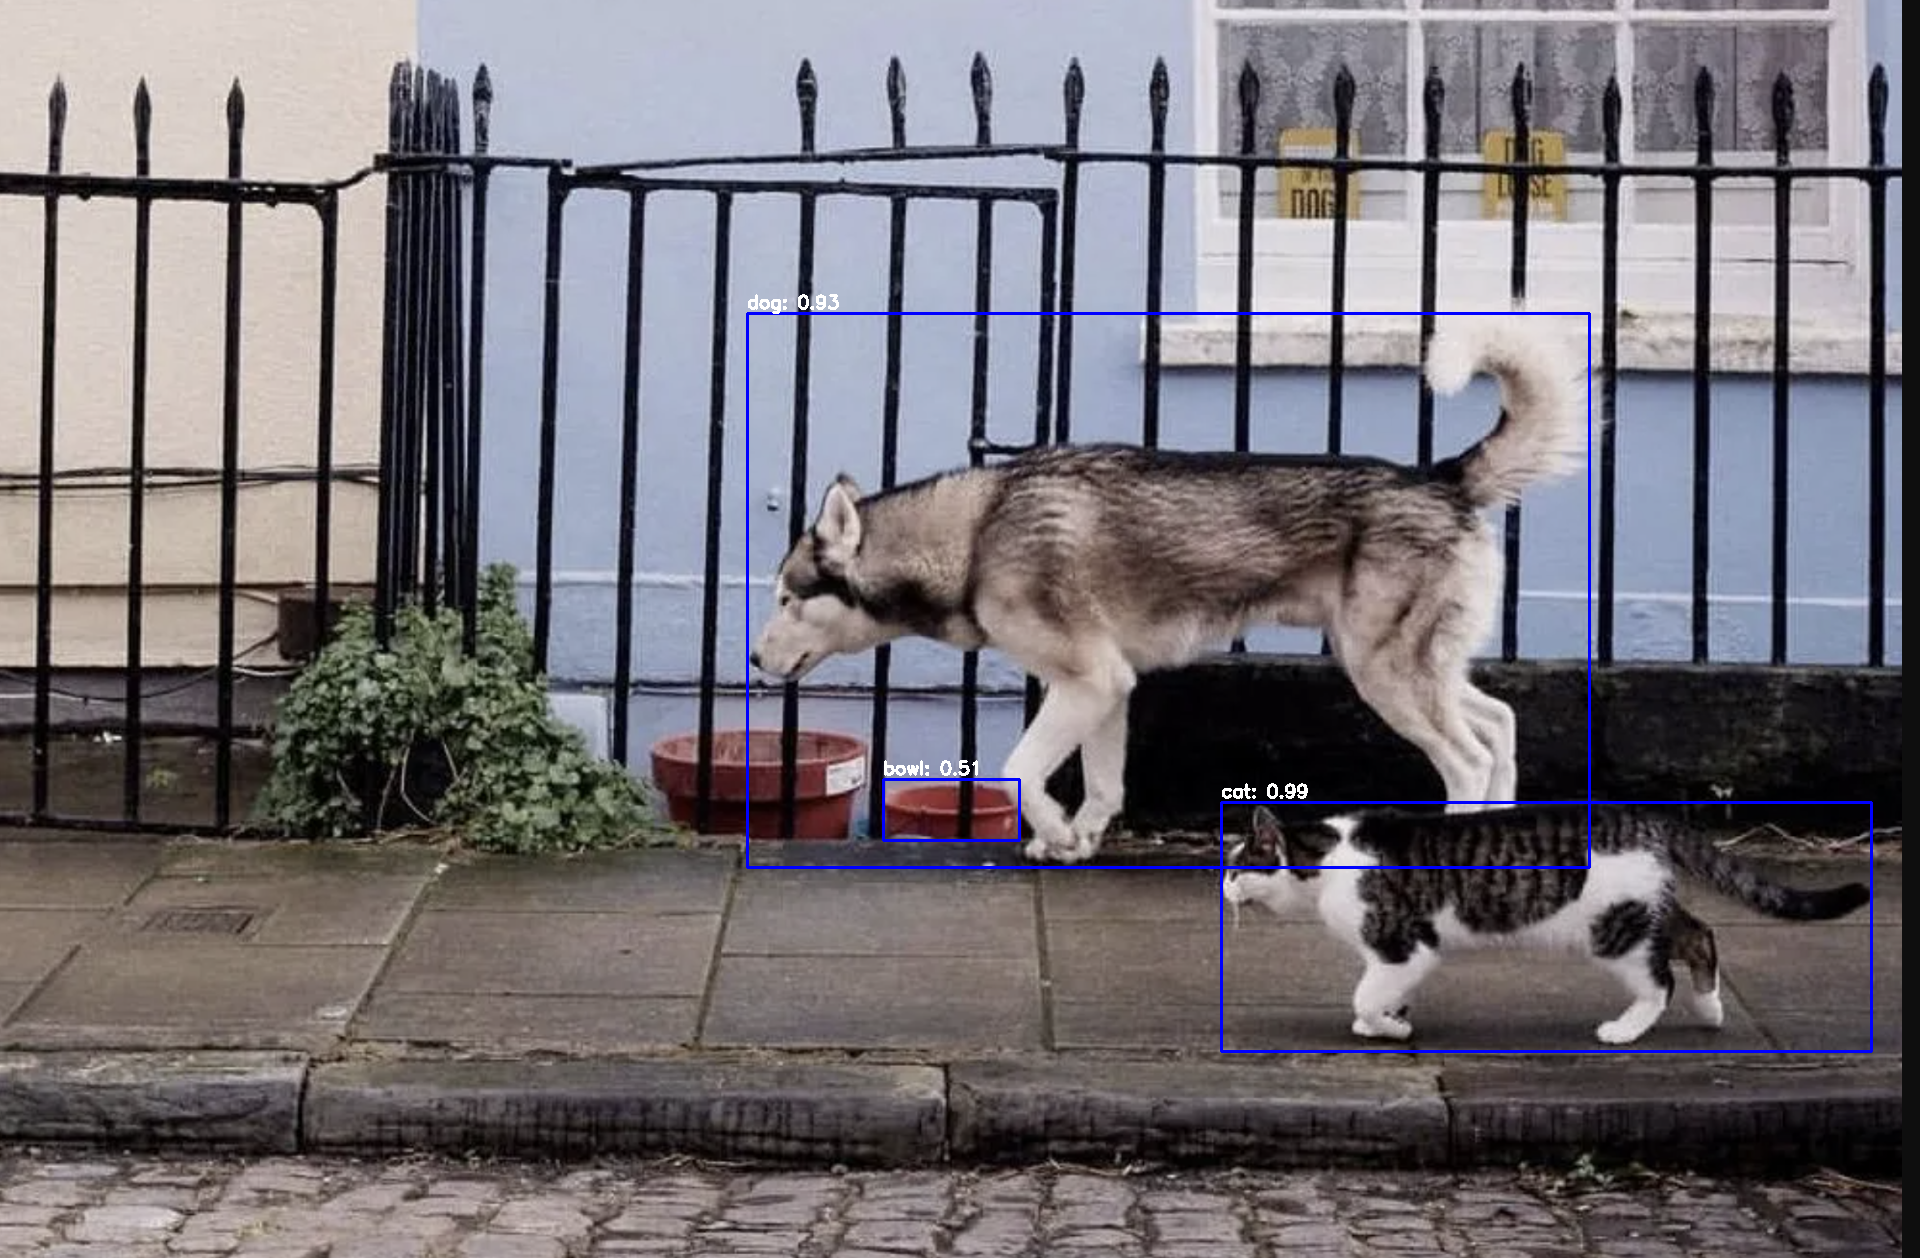

In [2]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files
import numpy as np

uploaded = files.upload()
image_path = next(iter(uploaded))  

net = cv2.dnn.readNetFromDarknet('yolov4.cfg', 'yolov4.weights')

output_layers = net.getUnconnectedOutLayersNames()

img = cv2.imread(image_path)

if img is None:
    raise ValueError(f"Failed to read the image from {image_path}. Check if the path is correct and the image is not corrupted.")

blob = cv2.dnn.blobFromImage(img, 1/255, (640, 640), swapRB=True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

classes = ["person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck", "boat",
           "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat",
           "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack",
           "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball",
           "kite", "baseball bat", "baseball glove", "skateboard", "surfboard", "tennis racket",
           "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", "apple",
           "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", "chair",
           "couch", "potted plant", "bed", "dining table", "toilet", "tv", "laptop", "mouse", "remote",
           "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator", "book",
           "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"]

boxes = []
confidences = []
class_ids = []

detected_labels = []

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x, center_y, width, height = (detection[0:4] * np.array([img.shape[1], img.shape[0], img.shape[1], img.shape[0]])).astype('int')
            x = int(center_x - width / 2)
            y = int(center_y - height / 2)
            boxes.append([x, y, int(width), int(height)])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)


box_color = (255, 0, 0)  
text_color = (255, 255, 255)  

for i in indices.flatten():
    x, y, w, h = boxes[i]
    label = str(classes[class_ids[i]])
    confidence = confidences[i]
    detected_labels.append(label)
    cv2.rectangle(img, (x, y), (x + w, y + h), box_color, 2)  
    cv2.putText(img, f"{label}: {confidence:.2f}", (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, text_color, 2)  





cv2_imshow(img)


In [3]:
from transformers import MvpTokenizer, MvpForConditionalGeneration

tokenizer = MvpTokenizer.from_pretrained("RUCAIBox/mvp")
model = MvpForConditionalGeneration.from_pretrained("RUCAIBox/mvp-story")

inputs = tokenizer(
    "Given the story title: a cat and a dog walking.",
    return_tensors="pt",
)
generated_ids = model.generate(**inputs, max_length=15)
tokenizer.batch_decode(generated_ids, skip_special_tokens=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/27.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/908 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/956 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.87G [00:00<?, ?B/s]

['A cat and a dog go for a walk in the park']